In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SERVER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv("depression_dataset.csv")

In [ ]:
print("Columns:",df.columns)

Columns: Index(['text', 'label'], dtype='object')


In [ ]:
df=df[['text','label']] 

In [7]:
df.dropna(inplace=True)

In [ ]:
def clean_text(text):
    text=text.lower()
    text=''.join([c for c in text if c not in string.punctuation])
    tokens=text.split()
    tokens=[word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
df['clean_text']=df['text'].astype(str).apply(clean_text)

In [ ]:
vectorizer=TfidfVectorizer(max_features=3000)
X=vectorizer.fit_transform(df['clean_text'])

In [ ]:
y=df['label']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9495798319327731


In [ ]:
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       783
           1       0.97      0.92      0.95       764

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547



In [ ]:
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[764  19]
 [ 59 705]]


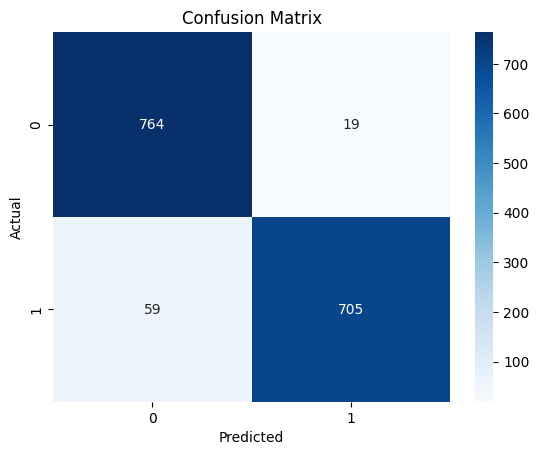

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()